In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [4]:
R = Runner(classifier='kunet3plus2d',
           discriminator='cnnplus',
           filter_num_down=[16, 32, 64, 128, 256], 
           filter_num_skip=[16, 16, 16, 16], 
           filter_num_aggregate=32, 
           stack_num_down=2, 
           stack_num_up=1, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=False, 
           pool=False, 
           unpool=False, 
           deep_supervision=False, 
           optimizer=None, 
           loss=None,
           metric=None
          )

KUNet3Plus2D: None, None, None
*** GP2  KUNet3Plus2D ***
Working directory: /tmp/tmpb9jgxtfnGP2
Using  discriminator (CNN+)


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

In [6]:
images = images[:6392]
masks = masks[:6392]

In [7]:
images.shape

(6392, 512, 512, 1)

In [8]:
masks.shape

(6392, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=3)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 35s 5s/step - loss: 0.6638 - dice_coeff: 0.3193 - val_loss: 0.6917 - val_dice_coeff: 0.2704
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 0.5638 - dice_coeff: 0.3722 - val_loss: 0.6893 - val_dice_coeff: 0.2702
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 0.4946 - dice_coeff: 0.4247 - val_loss: 0.6860 - val_dice_coeff: 0.2699
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 0.4310 - dice_coeff: 0.4818 - val_loss: 0.6820 - val_dice_coeff: 0.2694
Epoch 5/100
5/5 [==============================] - 7s 2s/step - loss: 0.3796 - dice_coeff: 0.5363 - val_loss: 0.6774 - val_dice_coeff: 0.2689
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 0.3454 - dice_coeff: 0.5774 - val_loss: 0.6720 - val_dice_coeff: 0.2683
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 0.3120 - dice_coeff: 0.6178 - val_loss: 0.6660 - va

In [11]:
R.classifier_scores

[[0.5476122498512268, 0.24668613076210022],
 [0.4907791316509247, 0.16880707442760468],
 [0.5499818325042725, 0.11754066497087479]]

In [12]:
R.discriminator_scores

[[5.270109249977395e-05, 1.0],
 [2.4861581550794654e-05, 1.0],
 [2.4538629077142105e-05, 1.0]]

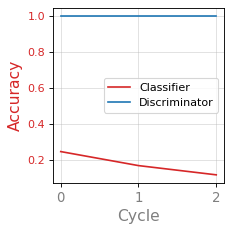

In [13]:
R.plot()

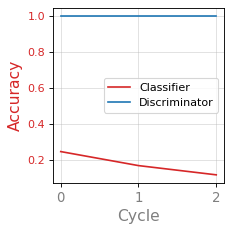

In [14]:
R.plot()